# Assignment 4
## Gal Dali

### Question 1

#### 1.1 Warm up
$$\dot{y} = y$$
$$y(0) = 1$$
$$t = [0, 2]$$

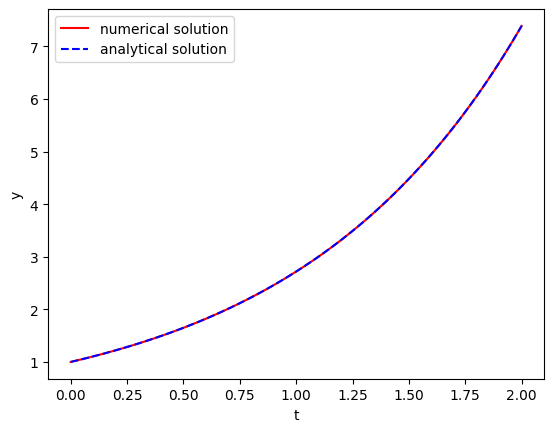

In [35]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def y_dot(t, y):
    return y


y0 = [1]

# solve the ode
t_span = [0, 2]
t_eval = np.linspace(t_span[0], t_span[1], 100)
sol = solve_ivp(y_dot, t_span, y0, t_eval=t_eval, method='RK45')

# plot the solution in red and the analytical solution in blue
plt.plot(t_eval, sol.y[0], 'r', label='numerical solution')
plt.plot(t_eval, np.exp(t_eval), 'b--', label='analytical solution')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

#### 1.2 Lotka - Volterra

$ x(t) = \text{ number of rabbits}$  
$ y(t) = \text{ number of foxes}$

$ \dot x = ax - bxy$  
$ \dot y  = -cy + dxy$

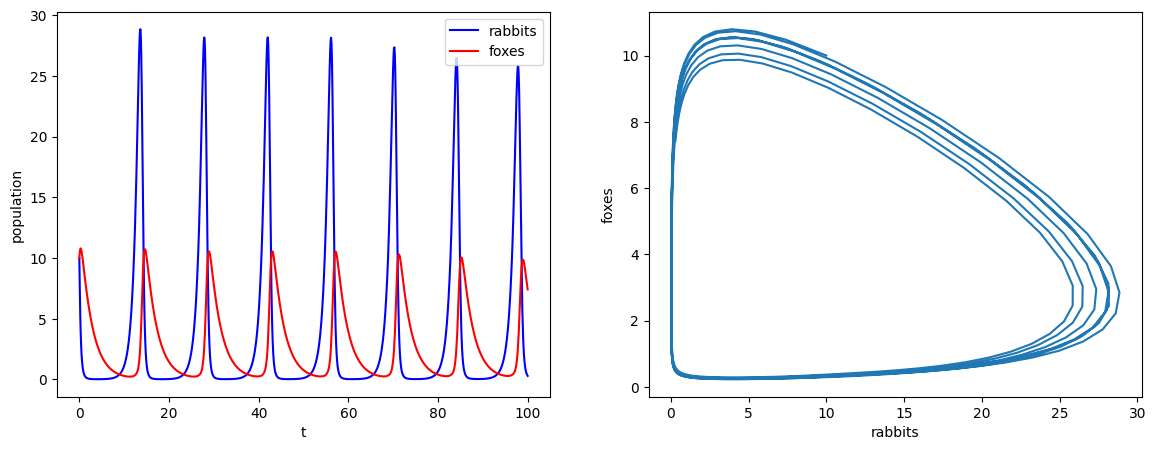

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def lotka_volterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

# initial conditions
a = 1.1
b = 0.4
c = 0.4
d = 0.1
y0 = 10
x0 = 10
t_eval = np.linspace(0, 100, 1000)

# solve the ode
sol = solve_ivp(lotka_volterra, [0, 100], [x0, y0], t_eval=t_eval, args=(a, b, c, d), method='RK45')

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# plot the solution of foxes and rabbits in the same graph
ax1.plot(t_eval, sol.y[0], 'b', label='rabbits')
ax1.plot(t_eval, sol.y[1], 'r', label='foxes')
ax1.set_xlabel('t')
ax1.set_ylabel('population')
ax1.legend()

# plot the solution as a phase plot (foxes vs. rabbits)
ax2.plot(sol.y[0], sol.y[1])
ax2.set_xlabel('rabbits')
ax2.set_ylabel('foxes')

plt.show()

### Question 2

#### Pythagorean Three Body Problem

### Verlet-Stormer Method

$$ \ddot{y} = A(y)$$

1. calculate the first step using Euler: $y_1 = y_0 + h * v_0$  
2. From then on, use the following equation: $y_{i+1} = 2y_i + h^2 * A(y_i) - y_{i-1}$


In [ ]:
# masses
m1 = 5
m2 = 4
m3 = 3

# gravitational constant
G = 1

# initial positions
pos1 = (0, 0)
pos2 = (3, 0)
pos3 = (0, 4)

# initial velocities
v1_0 = 0
v2_0 = 0
v3_0 = 0

t_span = [0, 15]

def A(y):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = y
    r12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    r13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    r23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)
    return [
        vx1, vy1, vx2, vy2, vx3, vy3,
        G * m2 * (x2 - x1) / r12**3 + G * m3 * (x3 - x1) / r13**3,
        G * m2 * (y2 - y1) / r12**3 + G * m3 * (y3 - y1) / r13**3,
        G * m1 * (x1 - x2) / r12**3 + G * m3 * (x3 - x2) / r23**3,
        G * m1 * (y1 - y2) / r12**3 + G * m3 * (y3 - y2) / r23**3,
        G * m1 * (x1 - x3) / r13**3 + G * m2 * (x2 - x3) / r23**3,
        G * m1 * (y1 - y3) / r13**3 + G * m2 * (y2 - y3) / r23**3
    ]